<a href="https://colab.research.google.com/github/DB9653/Projektarbeit/blob/main/FINAL_NSIT_IIITDWD_HASOC2020_subtaskB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Dataset Reading


In [ ]:
import pandas as pd 
import csv
data = pd.read_excel('/content/hasoc_2020_de_train_new_a.xlsx', converters={'tweet_id':int})
pd.set_option('display.max_colwidth',150)
data.head(10)

,tweet_id,text,task1,task2,ID
0,1133388798925189122,Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd,NOT,NONE,hasoc_2020_de_2684
1,1127134592517980161,RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstützung für den europäischen Kl…,NOT,NONE,hasoc_2020_de_1042
2,1128897106171842560,"@ruhrbahn jeden Morgen eine neue „Fahrzeugstörung“, ihr seid einfach nur zum Kotzen",NOT,NONE,hasoc_2020_de_774
3,1123576753199484928,"@Junge_Freiheit Die Inkas hatten sich schon dämlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles",NOT,NONE,hasoc_2020_de_559
4,1128743783393312768,RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken,HOF,PRFN,hasoc_2020_de_1969
5,1134139256375525376,ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN,HOF,PRFN,hasoc_2020_de_2926
6,1132759271618293761,RT @Schrammi44: Er ist einfach der GOAT @Bouncaay https://t.co/bb9b5SWaKi,NOT,NONE,hasoc_2020_de_2994
7,1131107693123526657,KFM Deutsche Mittelstand AG: Deutscher Mittelstandsanleihen FONDS zeichnet neue Hörmann-Anleihe mit Mindest-Kupon 4… https://t.co/5HeRedf9cx,NOT,NONE,hasoc_2020_de_1574
8,1133093570229997573,"@mentalshards_ ich will jetzt nicht offenden oder so, ich will einfach nur, das die scheiße weniger wird",HOF,PRFN,hasoc_2020_de_1480
9,1126898700683501569,RT @SteinbachErika: Einfach skandalös! https://t.co/dC5NXFbviQ,NOT,NONE,hasoc_2020_de_3224


In [ ]:
data.shape

(2373, 5)

In [ ]:
print(data.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object



# Making of "label" Variable


In [ ]:


label = data['task2']
label.head(10)



0    NONE
1    NONE
2    NONE
3    NONE
4    PRFN
5    PRFN
6    NONE
7    NONE
8    PRFN
9    NONE
Name: task2, dtype: object


# Checking Dataset Balancing


NONE    1700
PRFN     387
HATE     146
OFFN     140
Name: task2, dtype: int64


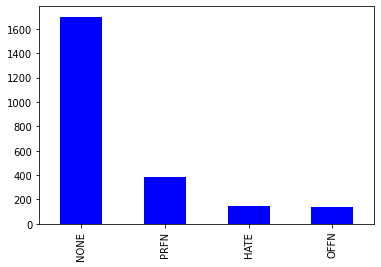

In [ ]:


print(label.value_counts())
import matplotlib.pyplot as plt
label.value_counts().plot(kind='bar', color='blue')



# Convering label into "0-NONE", "1-HATE", "2-OFFN", and "3-PRFN"


In [ ]:



import numpy as np
classes_list = ["NONE","HATE","OFFN","PRFN"]
label_index = data['task2'].apply(classes_list.index)
final_label = np.asarray(label_index)
print(final_label[:50])



[0 0 0 0 3 3 0 0 3 0 3 0 0 0 3 2 0 0 0 3 2 0 0 0 0 0 3 1 0 3 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 2 3 0 0 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension = to_categorical(final_label, num_classes=4)



In [ ]:
print(label_twoDimension[:10])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


# Making of "text" Variable


In [ ]:


text = data['text']
text.head(10)



0                 Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd
1    RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstützung für den europäischen Kl…
2                                                             @ruhrbahn jeden Morgen eine neue „Fahrzeugstörung“, ihr seid einfach nur zum Kotzen
3      @Junge_Freiheit Die Inkas hatten sich schon dämlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles
4                         RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken
5                                                                ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN
6                                                                       RT @Schrammi44: Er ist einfach der GOAT @Bouncaay ht

# Dataset Pre-processing


In [ ]:
def remove_umlaut(string):
    """
    Removes umlauts from strings and replaces them with the letter+e convention
    :param string: string to remove umlauts from
    :return: unumlauted string
    """
    u = 'ü'.encode()
    U = 'Ü'.encode()
    a = 'ä'.encode()
    A = 'Ä'.encode()
    o = 'ö'.encode()
    O = 'Ö'.encode()
    ss = 'ß'.encode()

    string = string.encode()
    string = string.replace(u, b'ue')
    string = string.replace(U, b'Ue')
    string = string.replace(a, b'ae')
    string = string.replace(A, b'Ae')
    string = string.replace(o, b'oe')
    string = string.replace(O, b'Oe')
    string = string.replace(ss, b'ss')

    string = string.decode('utf-8')
    return string

In [ ]:
text_wo_umlauts = text.apply(lambda x:remove_umlaut(x))
text_wo_umlauts.head(10)

0                    Deutsche rothaarige porno reife deutsche frauen porno. Deutsche politessen pornos porno deutsch inzets. https://t.co/xAag87Y0Jd
1    RT @NDRinfo: Die deutsche Klimaaktivistin Luisa Neubauer wirft Kanzlerin Merkel wegen ihrer fehlenden Unterstuetzung fuer den europaeischen Kl…
2                                                               @ruhrbahn jeden Morgen eine neue „Fahrzeugstoerung“, ihr seid einfach nur zum Kotzen
3        @Junge_Freiheit Die Inkas hatten sich schon daemlich angestellt, bei den spanischen Eindringlingen, aber der Deutsche toppt dann doch alles
4                            RT @technosteron: leute die 'boar' schreiben lassen sich bestimmt auch von ihren analphabetischen Vater in arsch ficken
5                                                                   ich habe mir gerade diese dorne aus meinem arsch gezogen https://t.co/x40mpKgBZN
6                                                                          RT @Schrammi44: Er ist einfach 

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"rt", " ", text)
   
    text = re.sub(r":", " : ", text)
   

  
    return text



In [ ]:
clean_text = text_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text.head(10)

0                                            deutsche rothaarige porno reife deutsche frauen porno  deutsche politessen pornos porno deutsch inzets  
1       ndrinfo :  die deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen ihrer fehlenden unterstuetzung fuer den europaeischen kl 
2                                                                 ruhrbahn jeden morgen eine neue  fahrzeugstoerung   ihr seid einfach nur zum kotzen
3          junge freiheit die inkas hatten sich schon daemlich angestellt  bei den spanischen eindringlingen  aber der deutsche toppt dann doch alles
4                               technosteron :  leute die  boar  schreiben lassen sich bestimmt auch von ihren analphabetischen vater in arsch ficken
5                                                                                           ich habe mir gerade diese dorne aus meinem arsch gezogen 
6                                                                                                   

# Removing stopwords


In [ ]:


import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
clean_text_ns=clean_text.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_ns.head(10))

0                              deutsche rothaarige porno reife deutsche frauen porno  deutsche politessen pornos porno deutsch inzets  
1       ndrinfo :  deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen fehlenden unterstuetzung fuer europaeischen kl 
2                                                                          ruhrbahn morgen neue  fahrzeugstoerung   seid einfach kotzen
3                                             junge freiheit inkas schon daemlich angestellt  spanischen eindringlingen  deutsche toppt
4                                            technosteron :  leute  boar  schreiben lassen bestimmt analphabetischen vater arsch ficken
5                                                                                                           gerade dorne arsch gezogen 
6                                                                                                 schrammi44 :  einfach goat  bouncaay 
7              kfm deutsche mittelstand ag :  de

# Stemming


In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_stem = clean_text_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_stem.head(10))

0                              deutsche rothaarige porno reife deutsche frauen porno  deutsche politessen pornos porno deutsch inzets  
1       ndrinfo :  deutsche klimaaktivistin luisa neubauer wirft kanzlerin merkel wegen fehlenden unterstuetzung fuer europaeischen kl 
2                                                                          ruhrbahn morgen neue  fahrzeugstoerung   seid einfach kotzen
3                                             junge freiheit inkas schon daemlich angestellt  spanischen eindringlingen  deutsche toppt
4                                            technosteron :  leute  boar  schreiben lassen bestimmt analphabetischen vater arsch ficken
5                                                                                                           gerade dorne arsch gezogen 
6                                                                                                 schrammi44 :  einfach goat  bouncaay 
7              kfm deutsche mittelstand ag :  de


# Tokenization using "keras"


In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_all = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_all.fit_on_texts(clean_text_stem)



# Making Vocab for words


In [ ]:


vocabulary_all = len(tok_all.word_counts)
print(vocabulary_all)



8769


In [ ]:


l = tok_all.word_index
print(l)



{'einfach': 1, 'deutsche': 2, 'arsch': 3, 'merkel': 4, 'schon': 5, 'fuer': 6, 'gt': 7, 'mal': 8, 'gruenen': 9, 'scheiss': 10, 'nazis': 11, 'dumm': 12, 'frauen': 13, 'halt': 14, 'ab': 15, 'porno': 16, 'welt': 17, 'linken': 18, 'mehr': 19, 'tagesschau': 20, 'hurensohn': 21, 'ja': 22, 'zurueck': 23, 'echt': 24, 'gibt': 25, 'gratis': 26, 'gruene': 27, 'scheisse': 28, 'islam': 29, 'deutschland': 30, 'immer': 31, 'e': 32, 'frau': 33, 'politiker': 34, 'hoe': 35, 'linke': 36, 'pack': 37, 's': 38, 'warum': 39, 'kopf': 40, 'erst': 41, 'eigentlich': 42, 'leute': 43, 'fresse': 44, 'stimmt': 45, 'ueber': 46, 'idioten': 47, '2': 48, 'dumme': 49, 'n': 50, 'afd': 51, 'zdfheute': 52, 'macht': 53, 'waere': 54, 'en': 55, '1': 56, 'd': 57, 'kinder': 58, 'kotzen': 59, 'europa': 60, 'nazi': 61, 'moechte': 62, 'deutschen': 63, 'deutsch': 64, 'lassen': 65, 'politik': 66, 'pa': 67, 'i': 68, 'wuerde': 69, 'ma': 70, 'raus': 71, 'koennte': 72, 'zeit': 73, 'geld': 74, 'schulz': 75, 'merkels': 76, 'a': 77, 'neue': 


# encoding or sequencing


In [ ]:


encoded_clean_text_stem = tok_all.texts_to_sequences(clean_text_stem)
print(clean_text_stem[0])
print(encoded_clean_text_stem[0])



deutsche rothaarige porno reife deutsche frauen porno  deutsche politessen pornos porno deutsch inzets  
[2, 1990, 16, 328, 2, 13, 16, 2, 1991, 85, 16, 64, 1992]


# Pre-padding


In [ ]:


from keras.preprocessing import sequence 
max_length = 100
padded_clean_text_stem = sequence.pad_sequences(encoded_clean_text_stem, maxlen=max_length, padding='pre')



#ADASYN

In [ ]:


from imblearn.over_sampling import ADASYN
ad = ADASYN(random_state=2)



In [ ]:
padded_clean_text_ADASYN, label_twoDimension_ADASYN = ad.fit_resample(padded_clean_text_stem, label_twoDimension)

In [ ]:


label_twoDimension.shape
padded_clean_text_stem.shape



(2373, 100)

In [ ]:
label_twoDimension_ADASYN.shape

(6683, 4)

# Reading Test Data and Pre-processing


In [ ]:


data_t = pd.read_csv('/content/german_test_1509.csv')
pd.set_option('display.max_colwidth',150)
data_t.head(10)



,tweet_id,text,task1,task2,ID
0,1129095874242650112,@derCarsti Boykottieren hört sich besser an. 💙💙,NOT,NONE,hasoc_2020_de_1053
1,1129004308396236800,"RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…",NOT,NONE,hasoc_2020_de_671
2,1130896929355907080,Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.,NOT,NONE,hasoc_2020_de_2977
3,1132251534329307136,"RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…",NOT,NONE,hasoc_2020_de_1746
4,1124941869115498496,@justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂,NOT,NONE,hasoc_2020_de_2416
5,1129712298531184641,"RT @VonSchwer: Ein guter Patriot geht von Bord‼️Gestürzt durch einen, vom ZDF finanzierten, linken Schmierenkomödianten 😡‼️ https://t.co/rl…",HOF,NONE,hasoc_2020_de_1112
6,1123981478361219073,@yooli_derechte @MontanaBlack Mich wundert es echt wie du noch keine Cockschelle bekommen hast. Du kinderfickender Hurensohn,HOF,OFFN,hasoc_2020_de_2938
7,1124978296628961287,Da war #SPD #Kuehnert und am Ende auch #Nahles einfach nur dumm: https://t.co/aj001ZKeWk,NOT,NONE,hasoc_2020_de_2205
8,1129473948813541376,"Nazan, komm bittebitte zurück, löse die „Punggdä“-Trulla ab und werde wieder LD-Moderatorin! 🙏🏻 #letsdance2019 #letsdance",NOT,NONE,hasoc_2020_de_387
9,1131048922527424512,"RT @Junge_Freiheit: Die europäische Spitzenkandidatin der Grünen im Europawahlkampf, Franziska Keller, hat sich für eine CO2-Steuer ausgesp…",NOT,NONE,hasoc_2020_de_459


In [ ]:
data_t.shape

(526, 5)

In [ ]:
print(data_t.dtypes)

tweet_id     int64
text        object
task1       object
task2       object
ID          object
dtype: object


In [ ]:
label_t = data_t['task2']
label_t.head()

0    NONE
1    NONE
2    NONE
3    NONE
4    NONE
Name: task2, dtype: object

NONE    378
PRFN     88
OFFN     36
HATE     24
Name: task2, dtype: int64


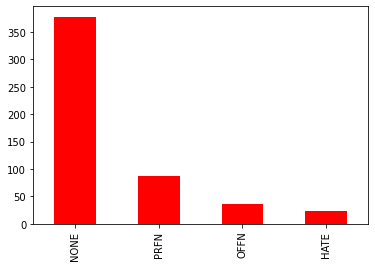

In [ ]:


print(label_t.value_counts())
import matplotlib.pyplot as plt
label_t.value_counts().plot(kind='bar', color='red')



In [ ]:


import numpy as np
classes_list_t = ["NONE","HATE","OFFN","PRFN"]
label_t_index = data_t['task2'].apply(classes_list_t.index)
final_label_t = np.asarray(label_t_index)
print(final_label_t[:10])



[0 0 0 0 0 0 2 0 0 0]


In [ ]:


from keras.utils.np_utils import to_categorical
label_twoDimension_t = to_categorical(final_label_t, num_classes=4)



In [ ]:
print(label_twoDimension_t[:10])

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:


text_t = data_t['text']
text_t.head(10)



0                                                                                                  @derCarsti Boykottieren hört sich besser an. 💙💙
1    RT @ibikus31: Es wird spekuliert, ob Merkel ein Amt in Brüssel übernimmt.\nWäre es so, wie schätzen Sie dann die Zukunft der Mitgliedstaaten…
2                             Hat #Hitler wirklich den Krieg in der Wüste verloren? Nach der #Welt Schlagzeile hat die #Tagesschau nicht reagiert.
3     RT @Beatrix_vStorch: #May tritt in UK unter Tränen zurück. Wenn #Merkel zurücktritt, dann auch unter Tränen – unter den Freudentränen von M…
4                                                     @justmeDoro Eher nicht. Das Gänse hauen wieder ab in ihre warmen Überwinterungsquartiere. 😅😂
5     RT @VonSchwer: Ein guter Patriot geht von Bord‼️Gestürzt durch einen, vom ZDF finanzierten, linken Schmierenkomödianten 😡‼️ https://t.co/rl…
6                     @yooli_derechte @MontanaBlack Mich wundert es echt wie du noch keine Cockschelle bekommen hast. 

In [ ]:
test_wo_umlauts = text_t.apply(lambda x: remove_umlaut(x))

In [ ]:


import re 

def text_clean(text):
    ''' Pre process and convert texts to a list of words '''
    
    text=text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub('https?://\S+|www\.\S+', "", text)
    text = re.sub(r"rt", " ", text)

    return text



In [ ]:
clean_text_t = test_wo_umlauts.apply(lambda x:text_clean(x))

In [ ]:
clean_text_t.head(10)

0                                                                                                      dercarsti boykottieren hoe  sich besser an.   
1         ibikus31: es wird spekulie , ob merkel ein amt in bruessel uebernimmt. waere es so, wie schaetzen sie dann die zukunft der mitgliedstaaten 
2                                hat  hitler wirklich den krieg in der wueste verloren  nach der  welt schlagzeile hat die  tagesschau nicht reagie .
3       beatrix vstorch:  may tritt in uk unter traenen zurueck. wenn  merkel zuruecktritt, dann auch unter traenen   unter den freudentraenen von m 
4                                                        justmedoro eher nicht. das gaense hauen wieder ab in ihre warmen ueberwinterungsqua iere.   
5                          vonschwer: ein guter patriot geht von bord  gestuerzt durch einen, vom zdf finanzie en, linken schmierenkomoedianten      
6                          yooli derechte  montanablack mich wunde  es echt wie du noch keine cocksc

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def stop_words_removal(text1):
    text1=[w for w in  text1.split(" ")  if w not in stopwords.words('german')]
    return " ".join(text1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_text_t_ns=clean_text_t.apply(lambda x: stop_words_removal(x))

In [ ]:
print(clean_text_t_ns.head(10))

0                                                                                dercarsti boykottieren hoe  besser an.   
1                        ibikus31: spekulie , merkel amt bruessel uebernimmt. waere so, schaetzen zukunft mitgliedstaaten 
2                                            hitler wirklich krieg wueste verloren   welt schlagzeile  tagesschau reagie .
3                        beatrix vstorch:  may tritt uk traenen zurueck.  merkel zuruecktritt, traenen   freudentraenen m 
4                                                justmedoro eher nicht. gaense hauen ab warmen ueberwinterungsqua iere.   
5                 vonschwer: guter patriot geht bord  gestuerzt einen, zdf finanzie en, linken schmierenkomoedianten      
6                            yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                                spd  kuehne  ende  nahles einfach dumm:  
8               

In [ ]:


# Stemming
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("german")

def word_stemmer(text):
    stem_text = "".join([stemmer.stem(i) for i in text])
    return stem_text



In [ ]:
clean_text_t_stem = clean_text_t_ns.apply(lambda x : word_stemmer(x))

In [ ]:
print(clean_text_t_stem.head(10))

0                                                                                dercarsti boykottieren hoe  besser an.   
1                        ibikus31: spekulie , merkel amt bruessel uebernimmt. waere so, schaetzen zukunft mitgliedstaaten 
2                                            hitler wirklich krieg wueste verloren   welt schlagzeile  tagesschau reagie .
3                        beatrix vstorch:  may tritt uk traenen zurueck.  merkel zuruecktritt, traenen   freudentraenen m 
4                                                justmedoro eher nicht. gaense hauen ab warmen ueberwinterungsqua iere.   
5                 vonschwer: guter patriot geht bord  gestuerzt einen, zdf finanzie en, linken schmierenkomoedianten      
6                            yooli derechte  montanablack wunde  echt cockschelle bekommen hast. kinderfickender hurensohn
7                                                                                spd  kuehne  ende  nahles einfach dumm:  
8               

In [ ]:


import keras
import tensorflow
from keras.preprocessing.text import Tokenizer
tok_test = Tokenizer(filters='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~', lower=True, char_level = False)
tok_test.fit_on_texts(clean_text_t_stem)



In [ ]:


vocabulary_all_test = len(tok_test.word_counts)
print(vocabulary_all_test)



2687


In [ ]:


test_list = tok_test.word_index
print(test_list)



{'einfach': 1, 'deutsche': 2, 'arsch': 3, 'merkel': 4, 'fuer': 5, 'schon': 6, 'gruenen': 7, 'scheiss': 8, 'gt': 9, 'ab': 10, 'mal': 11, 'halt': 12, 'linken': 13, 'dumm': 14, 'porno': 15, 'welt': 16, 'hurensohn': 17, 'immer': 18, 'nazis': 19, 'frau': 20, 'mehr': 21, 'scheisse': 22, 'frauen': 23, 'ja': 24, 'zurueck': 25, 'gratis': 26, 'echt': 27, 'gruene': 28, 'warum': 29, 'tagesschau': 30, 'islam': 31, 'gibt': 32, 'en': 33, 'kinder': 34, 'ficken': 35, 'pack': 36, 'heute': 37, 'idioten': 38, 'ueber': 39, 'hoe': 40, 'besser': 41, 'lange': 42, 'eu': 43, 'dumme': 44, 'e': 45, 'schulz': 46, '3': 47, 'linke': 48, 'wuerde': 49, 'erst': 50, 'leben': 51, 'bild': 52, 'europa': 53, 'ist': 54, 'kopf': 55, 's': 56, 'kurz': 57, '5': 58, '12': 59, 'hasse': 60, 'deutschland': 61, 'eigentlich': 62, 'fresse': 63, 'b': 64, 'gabriel': 65, 'neue': 66, 'an': 67, 'waere': 68, 'eher': 69, 'nicht': 70, 'ganzen': 71, 'lassen': 72, 'a': 73, 'grund': 74, 'kotzen': 75, 'de': 76, 'dummen': 77, 'ma': 78, 'afd': 79, '

In [ ]:
encoded_clean_text_t_stem = tok_all.texts_to_sequences(clean_text_t_stem)
print(clean_text_t_stem[0])
print(encoded_clean_text_t_stem[0])

 dercarsti boykottieren hoe  besser an.   
[35, 84]


In [ ]:


from keras.preprocessing import sequence
max_length = 100
padded_clean_text_t_stem = sequence.pad_sequences(encoded_clean_text_t_stem, maxlen=max_length, padding='pre')




# FastText Embeddings


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gunzip /content/drive/MyDrive/cc.de.300.vec.gz

In [ ]:


# FastText Emdedding link - https://fasttext.cc/docs/en/crawl-vectors.html

import os
embeddings_index = {}
f = open('/content/drive/MyDrive/cc.de.300.vec',encoding='utf-8',errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))



Loaded 2000000 word vectors.


In [ ]:


embedding_matrix = np.zeros((vocabulary_all+1, 300))
for word, i in tok_all.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector



# CNN1 Model


In [ ]:


from keras.preprocessing import sequence
from keras.preprocessing import text
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, Flatten
from keras.preprocessing import text
from keras.models import Sequential,Model
from keras.layers import Dense ,Activation,MaxPool1D,Conv1D,Flatten,Dropout,Activation,Dropout,Input,Lambda,concatenate
from keras.utils import np_utils
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import nltk
import csv
import pandas as pd

from keras.preprocessing import text as keras_text, sequence as keras_seq



In [ ]:
Embedding_Layer = Embedding(vocabulary_all+1, 300, weights=[embedding_matrix], input_length=max_length)

In [ ]:


CNN1_network=Sequential([Embedding_Layer,
                        Conv1D(128,3,activation="relu",padding='same'),
                       Dropout(0.2),
                       MaxPool1D(2),
                       Flatten(),
                       Dense(64,activation="relu"),
                       Dropout(0.3),
                       Dense(4,activation="sigmoid")
                       ])



In [ ]:
CNN1_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          2631000   
                                                                 
 conv1d (Conv1D)             (None, 100, 128)          115328    
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                        

In [ ]:
# https://stackoverflow.com/questions/62707558/importerror-cannot-import-name-adam-from-keras-optimizers
from tensorflow.keras.optimizers import Adam
CNN1_network.compile(loss = "binary_crossentropy", optimizer=Adam(lr=0.00003), metrics=["accuracy"])




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


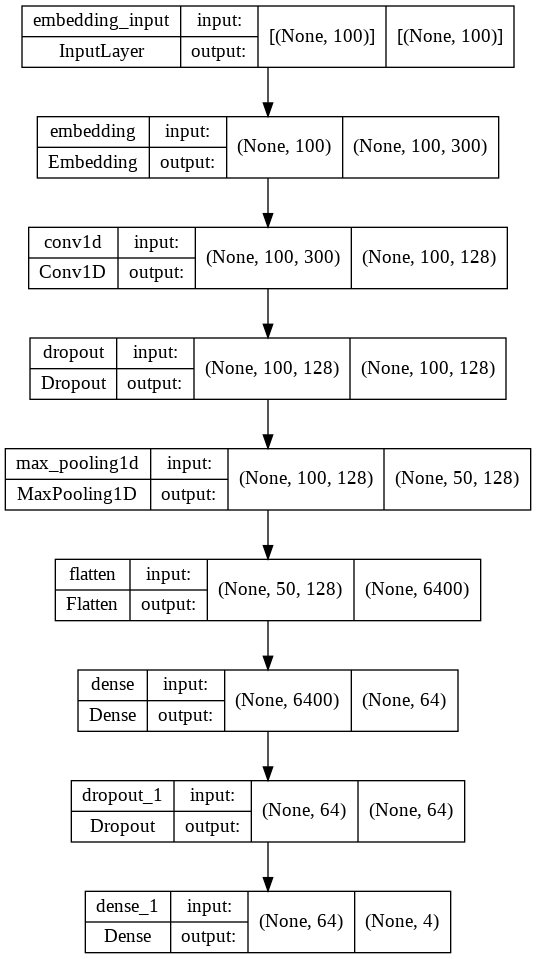

In [ ]:


from keras.utils.vis_utils import plot_model
plot_model(CNN1_network, to_file='CNN1_model.png', show_shapes=True, show_layer_names=True)



# Making of "earlystopper" and "reduce_lr"


In [ ]:


from keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint
earlystopper = EarlyStopping(patience=8, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=2, min_lr=0.00001, verbose=1)



# Model Fitting or Training


In [ ]:
hist = CNN1_network.fit(padded_clean_text_stem,label_twoDimension,epochs=200,batch_size=32,callbacks=[earlystopper, reduce_lr])

Epoch 1/200
75/75 [==============================] - 11s 12ms/step - loss: 0.6548 - accuracy: 0.5605 - lr: 3.0000e-05
Epoch 2/200
75/75 [==============================] - 1s 11ms/step - loss: 0.4796 - accuracy: 0.7046 - lr: 3.0000e-05
Epoch 3/200
75/75 [==============================] - 1s 11ms/step - loss: 0.3903 - accuracy: 0.7160 - lr: 3.0000e-05
Epoch 4/200
75/75 [==============================] - 1s 11ms/step - loss: 0.3865 - accuracy: 0.7160 - lr: 3.0000e-05
Epoch 5/200
75/75 [==============================] - 1s 10ms/step - loss: 0.3897 - accuracy: 0.7151 - lr: 3.0000e-05
Epoch 6/200
75/75 [==============================] - 1s 10ms/step - loss: 0.3842 - accuracy: 0.7147 - lr: 3.0000e-05
Epoch 7/200
75/75 [==============================] - 1s 10ms/step - loss: 0.3818 - accuracy: 0.7168 - lr: 3.0000e-05
Epoch 8/200
75/75 [==============================] - 1s 10ms/step - loss: 0.3784 - accuracy: 0.7143 - lr: 3.0000e-05
Epoch 9/200
75/75 [==============================] - 1s 11ms/st

# log loss


In [ ]:
CNN1_model_predictions = CNN1_network.predict(padded_clean_text_t_stem)

In [ ]:
from sklearn.metrics import log_loss
log_loss_test= log_loss(label_twoDimension_t,CNN1_model_predictions)
log_loss_test

1.6846130183538552

# Classification Report


In [ ]:
predictions = np.zeros_like(CNN1_model_predictions)
predictions[np.arange(len(CNN1_model_predictions)), CNN1_model_predictions.argmax(1)] = 1

In [ ]:


predictionInteger=(np.argmax(predictions, axis=1))
predictionInteger



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 1, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3,

In [ ]:


pred_label = np.array(predictionInteger)
df = pd.DataFrame(data=pred_label , columns=["task2"])
print(df)



     task2
0        0
1        0
2        0
3        0
4        0
..     ...
521      0
522      0
523      0
524      3
525      0

[526 rows x 1 columns]


In [ ]:
df.to_csv("NSIT_HASOC2020_TASK_B_submission_DE_B.csv", index=False)

In [ ]:


from sklearn.metrics import classification_report
print(classification_report(label_twoDimension_t,predictions))



              precision    recall  f1-score   support

           0       0.82      0.95      0.88       378
           1       0.30      0.12      0.18        24
           2       0.29      0.11      0.16        36
           3       0.65      0.47      0.54        88

   micro avg       0.77      0.77      0.77       526
   macro avg       0.51      0.41      0.44       526
weighted avg       0.73      0.77      0.74       526
 samples avg       0.77      0.77      0.77       526



# Epoch v/s Loss Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

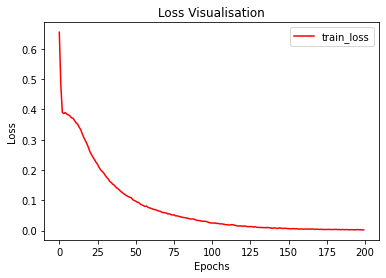

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history["loss"],color = 'red', label = 'train_loss')
#plt.plot(hist.history["val_loss"],color = 'blue', label = 'val_loss')
plt.title('Loss Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('CNN1_HASOC2020_TASK_B_Ger_lossPlot.pdf',dpi=1000)

from google.colab import files
files.download('CNN1_HASOC2020_TASK_B_Ger_lossPlot.pdf')

# Epoch v/s Accuracy Plot


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

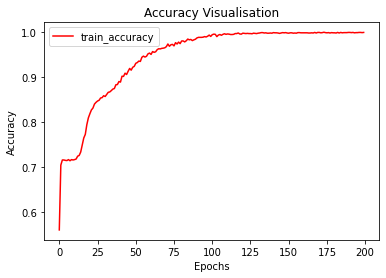

In [ ]:


plt.plot(hist.history["accuracy"],color = 'red', label = 'train_accuracy')
#plt.plot(hist.history["val_accuracy"],color = 'blue', label = 'val_accuracy')
plt.title('Accuracy Visualisation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('CNN1_HASOC2020_TASK_B_Ger_accuracyPlot.pdf',dpi=1000)
files.download('CNN1_HASOC2020_TASK_B_Ger_accuracyPlot.pdf') 



# Area under Curve-ROC


In [ ]:


pred_train = CNN1_network.predict(padded_clean_text_stem)
pred_test = CNN1_network.predict(padded_clean_text_t_stem)



In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

def plot_AUC_ROC(y_true, y_pred):
    n_classes = 2 #change this value according to class value

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
############################################################################################
    lw = 2
    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)
    
    colors = cycle(['aqua', 'darkorange'])
    #classes_list1 = ["DE","NE","DK"]
    classes_list1 = ["Non-duplicate","Duplicate"]
    for i, color,c in zip(range(n_classes), colors,classes_list1):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='{0} (AUC = {1:0.2f})'
                ''.format(c, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    #plt.show()
    plt.savefig('CNN1_HASOC2020_TASK_B_Ger_Area_RocPlot.pdf',dpi=1000)
    files.download('CNN1_HASOC2020_TASK_B_Ger_Area_RocPlot.pdf')

  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

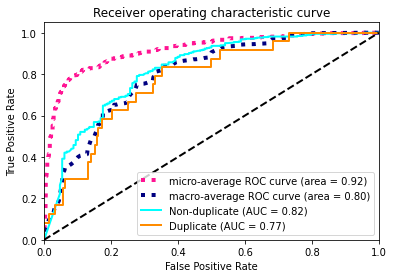

In [ ]:
plot_AUC_ROC(label_twoDimension_t,pred_test)